In [1]:
import csv
import math
import pandas as pd
jeff_mth1_df = pd.read_csv("C:/Users/scott/school/BMI6106/CSV_wardlejeffrey_901247626_09Mar2025_1826.csv")
jeff_mth2_df = pd.read_csv("C:/Users/scott/school/BMI6106/CSV_wardlejeffrey_901247626_09Mar2025_1829.csv")


In [2]:
print(jeff_mth1_df.head()) #see what it looks like
print(jeff_mth1_df.dtypes)

  DeviceType  SerialNumber Description        EventDateTime  Readings (mg/dL)
0  t:slim X2     901247626         EGV  2025-02-10T00:01:43               119
1  t:slim X2     901247626         EGV  2025-02-10T00:06:44               113
2  t:slim X2     901247626         EGV  2025-02-10T00:11:42               111
3  t:slim X2     901247626         EGV  2025-02-10T00:16:40               108
4  t:slim X2     901247626         EGV  2025-02-10T00:21:40               105
DeviceType          object
SerialNumber         int64
Description         object
EventDateTime       object
Readings (mg/dL)     int64
dtype: object


In [3]:
jeff_all_df = pd.concat([jeff_mth1_df, jeff_mth2_df], ignore_index=True)
print(jeff_all_df)

      DeviceType  SerialNumber Description        EventDateTime  \
0      t:slim X2     901247626         EGV  2025-02-10T00:01:43   
1      t:slim X2     901247626         EGV  2025-02-10T00:06:44   
2      t:slim X2     901247626         EGV  2025-02-10T00:11:42   
3      t:slim X2     901247626         EGV  2025-02-10T00:16:40   
4      t:slim X2     901247626         EGV  2025-02-10T00:21:40   
...          ...           ...         ...                  ...   
17008  t:slim X2     901247626          BG  2025-02-09T16:27:11   
17009  t:slim X2     901247626          BG  2025-02-09T16:36:54   
17010  t:slim X2     901247626          BG  2025-02-09T16:41:58   
17011  t:slim X2     901247626          BG  2025-02-09T17:31:52   
17012  t:slim X2     901247626          BG  2025-02-09T19:25:40   

       Readings (mg/dL)  
0                   119  
1                   113  
2                   111  
3                   108  
4                   105  
...                 ...  
17008        

In [4]:
# read in pump events data
jeff_mth1_events_df = pd.read_csv("C:/Users/scott/school/BMI6106/JeffWardle_pump_events1_09Mar2025.csv")
jeff_mth2_events_df = pd.read_csv("C:/Users/scott/school/BMI6106/JeffWardle_pump_events1_09Mar2025.csv")
jeff_events_all_df = pd.concat([jeff_mth1_events_df, jeff_mth2_events_df], ignore_index=True)


In [5]:
print(jeff_events_all_df.head()) #see what it looks like

    Type          BolusType BolusDeliveryMethod  BG (mg/dL)  SerialNumber  \
0  Bolus               Auto                Auto         201     901247626   
1  Bolus               Auto                Auto         221     901247626   
2  Bolus  Food / Correction            Standard         245     901247626   
3  Bolus               Auto                Auto         183     901247626   
4  Bolus  Food / Correction            Standard         203     901247626   

    CompletionDateTime  InsulinDelivered  FoodDelivered  CorrectionDelivered  \
0  2025-01-11T08:59:40              1.13           0.00                 0.00   
1  2025-01-11T12:14:43              1.86           0.00                 0.00   
2  2025-01-11T12:43:03             16.00          14.50                 1.49   
3  2025-01-11T15:31:27              0.96           0.00                 0.00   
4  2025-01-11T16:09:45              3.17           2.73                 0.43   

  CompletionStatusDesc  BolexStartDateTime  BolexComplet

In [6]:
jeff_all_df[['EventDate', 'EventTime']] = jeff_all_df['EventDateTime'].str.split('T', expand=True)

jeff_all_df = jeff_all_df.drop(columns=['EventDateTime'])

In [7]:
jeff_events_all_df[['EventDate', 'EventTime']] = jeff_events_all_df['CompletionDateTime'].str.split('T', expand=True)

jeff_events_all_df = jeff_events_all_df.drop(columns=['CompletionDateTime'])

In [8]:
#rename and drop columns
jeff_all_df = jeff_all_df.rename(columns={'Readings (mg/dL)': 'BG'})
jeff_all_df = jeff_all_df.drop(columns=['DeviceType','SerialNumber'])

In [9]:
#rename and drop columns
jeff_events_all_df = jeff_events_all_df.rename(columns={'BG (mg/dL)': 'BGEvent', 'TargetBG (mg/dL)' : 'Target'} )
jeff_events_all_df = jeff_events_all_df.drop(columns=['BolexStartDateTime','SerialNumber','BolexCompletionDateTime','BolexInsulinDelivered',
                                                       'BolexCompletionStatusDesc','StandardPercent','Duration (mins)'])

In [10]:
jeff_all_df['EventDate'] = pd.to_datetime(jeff_all_df['EventDate']) 
jeff_all_df['EventTime'] = pd.to_datetime(jeff_all_df['EventTime'], format='%H:%M:%S')

In [11]:
jeff_events_all_df['EventDate'] = pd.to_datetime(jeff_events_all_df['EventDate']) 
jeff_events_all_df['EventTime'] = pd.to_datetime(jeff_events_all_df['EventTime'], format='%H:%M:%S')

In [12]:
#round column to 5 minute in prep for merging
jeff_all_df['RoundedTime'] = jeff_all_df['EventTime'].dt.floor('5min')
jeff_events_all_df['RoundedTime'] = jeff_events_all_df['EventTime'].dt.floor('5min')
jeff_all_df = jeff_all_df.drop(columns=['EventTime'])
jeff_events_all_df = jeff_events_all_df.drop(columns=['EventTime'])

In [13]:
print(jeff_events_all_df.head())

    Type          BolusType BolusDeliveryMethod  BGEvent  InsulinDelivered  \
0  Bolus               Auto                Auto      201              1.13   
1  Bolus               Auto                Auto      221              1.86   
2  Bolus  Food / Correction            Standard      245             16.00   
3  Bolus               Auto                Auto      183              0.96   
4  Bolus  Food / Correction            Standard      203              3.17   

   FoodDelivered  CorrectionDelivered CompletionStatusDesc  CarbSize  Target  \
0           0.00                 0.00            Completed         0     110   
1           0.00                 0.00            Completed         0     110   
2          14.50                 1.49            Completed        80     110   
3           0.00                 0.00            Completed         0     110   
4           2.73                 0.43            Completed        15       0   

   CorrectionFactor  CarbRatio  EventDate         

In [14]:
jeff_events_all_df.to_csv("jeff_events_all_df.csv")

In [15]:
#merge the event dataset to all dataset
jeff_merged_df = jeff_all_df.merge(jeff_events_all_df, on=['EventDate', 'RoundedTime'],  #merge on these two common columns
    how='left'  #keep all rows from jeff_all_df
)

In [16]:
#sort by EventDate, RoundedTime and Type (descending)
jeff_merged_df = jeff_merged_df.sort_values(
    by=['EventDate', 'RoundedTime', 'Type'], 
    ascending=[True, True, False]
)

#drop duplicates while keeping the first occurrence in the sorted order
jeff_merged_df = jeff_merged_df.drop_duplicates(
    subset=['EventDate', 'RoundedTime'], 
    keep='first'
)

print(jeff_merged_df.head())

     Description   BG  EventDate         RoundedTime Type BolusType  \
8197         EGV  170 2025-01-11 1900-01-01 00:00:00  NaN       NaN   
8198         EGV  164 2025-01-11 1900-01-01 00:05:00  NaN       NaN   
8199         EGV  169 2025-01-11 1900-01-01 00:10:00  NaN       NaN   
8200         EGV  169 2025-01-11 1900-01-01 00:15:00  NaN       NaN   
8201         EGV  164 2025-01-11 1900-01-01 00:20:00  NaN       NaN   

     BolusDeliveryMethod  BGEvent  InsulinDelivered  FoodDelivered  \
8197                 NaN      NaN               NaN            NaN   
8198                 NaN      NaN               NaN            NaN   
8199                 NaN      NaN               NaN            NaN   
8200                 NaN      NaN               NaN            NaN   
8201                 NaN      NaN               NaN            NaN   

      CorrectionDelivered CompletionStatusDesc  CarbSize  Target  \
8197                  NaN                  NaN       NaN     NaN   
8198            

In [17]:
#take a look at the dataset
jeff_merged_df.to_csv("jeff_merged_df.csv")

In [18]:
print(jeff_merged_df.dtypes)

Description                     object
BG                               int64
EventDate               datetime64[ns]
RoundedTime             datetime64[ns]
Type                            object
BolusType                       object
BolusDeliveryMethod             object
BGEvent                        float64
InsulinDelivered               float64
FoodDelivered                  float64
CorrectionDelivered            float64
CompletionStatusDesc            object
CarbSize                       float64
Target                         float64
CorrectionFactor               float64
CarbRatio                      float64
dtype: object


In [19]:
#define weekday or weekend
jeff_merged_df['DayType'] = jeff_merged_df['EventDate'].dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [20]:
# Define a list of jeffs holiday dates
jeff_holiday_dates = ['2025-01-20','2025-02-17']  # Work Holidays
jeff_holiday_dates = pd.to_datetime(jeff_holiday_dates)  # get in right format
print(jeff_holiday_dates)


DatetimeIndex(['2025-01-20', '2025-02-17'], dtype='datetime64[ns]', freq=None)


In [21]:
#create the Holiday column
jeff_merged_df['Holiday'] = jeff_merged_df['EventDate'].isin(jeff_holiday_dates).map({True: 'Holiday', False: 'Not Holiday'})


In [22]:
# Define work hours range
jeff_start_time = pd.to_datetime('07:00:00', format='%H:%M:%S').time()
jeff_end_time = pd.to_datetime('16:00:00', format='%H:%M:%S').time()
jeff_merged_df['EventTimeTimePart'] = pd.to_datetime(jeff_merged_df['RoundedTime'], format='%H:%M:%S').dt.time

In [23]:
#create WorkHours column based on conditions
jeff_merged_df['WorkHours'] = jeff_merged_df.apply(
    lambda obs: 'AtWork' if (jeff_start_time <= obs['EventTimeTimePart'] <= jeff_end_time and
        obs['Holiday'] == 'Not Holiday' and obs['DayType'] == 'Weekday') else 'NotAtWork',
    axis=1)

In [24]:
WorkHours_counts = jeff_merged_df['WorkHours'].value_counts()
print(WorkHours_counts)
Holiday_counts = jeff_merged_df['Holiday'].value_counts()
print(Holiday_counts)
DayType_counts = jeff_merged_df['DayType'].value_counts()
print(DayType_counts)

WorkHours
NotAtWork    12388
AtWork        4111
Name: count, dtype: int64
Holiday
Not Holiday    15929
Holiday          570
Name: count, dtype: int64
DayType
Weekday    11407
Weekend     5092
Name: count, dtype: int64


In [25]:
#create InTarget column if blood glucose is in Target range
jeff_merged_df['MinTarget'] = 70
jeff_merged_df['MaxTarget'] = 150

jeff_merged_df['InTarget'] = ((jeff_merged_df['BG'] >= jeff_merged_df['MinTarget']) & 
    (jeff_merged_df['BG'] <= jeff_merged_df['MaxTarget'])).map({True: 'Yes', False: 'No'})


In [26]:
jeff_merged_df.to_csv("jeff_merged_df.csv")

In [27]:
#see how many intargets
InTarget_counts = jeff_merged_df['InTarget'].value_counts()
print(InTarget_counts)
jeff_average_BG = jeff_merged_df["BG"].mean() 
print(jeff_average_BG)
jeff_median_BG = jeff_merged_df["BG"].median() 
print(jeff_median_BG)

InTarget
Yes    9783
No     6716
Name: count, dtype: int64
148.54821504333597
137.0


In [28]:
#create histogram
import numpy as np

import matplotlib.pyplot as plt
def histogram(somelist, bins): #feed the function the list and bins
    min_val = min(somelist) #calculate min and max values to use in function
    max_val = max(somelist)
    bin_edges = np.linspace(min_val, max_val, bins+1) #use linspace function to get the edges
    bin_counts = np.histogram(somelist, bin_edges) #use histogram function to feed in edges to get counts
    
    return bin_edges, bin_counts #return the arrays needed
    
#call function
print(histogram(jeff_merged_df["BG"], bins = 20))


(array([ 39. ,  57.1,  75.2,  93.3, 111.4, 129.5, 147.6, 165.7, 183.8,
       201.9, 220. , 238.1, 256.2, 274.3, 292.4, 310.5, 328.6, 346.7,
       364.8, 382.9, 401. ]), (array([  74,  432, 1035, 2110, 3239, 2819, 1927, 1429, 1108,  757,  521,
        406,  245,  154,   91,   31,   16,   19,   20,   66], dtype=int64), array([ 39. ,  57.1,  75.2,  93.3, 111.4, 129.5, 147.6, 165.7, 183.8,
       201.9, 220. , 238.1, 256.2, 274.3, 292.4, 310.5, 328.6, 346.7,
       364.8, 382.9, 401. ])))


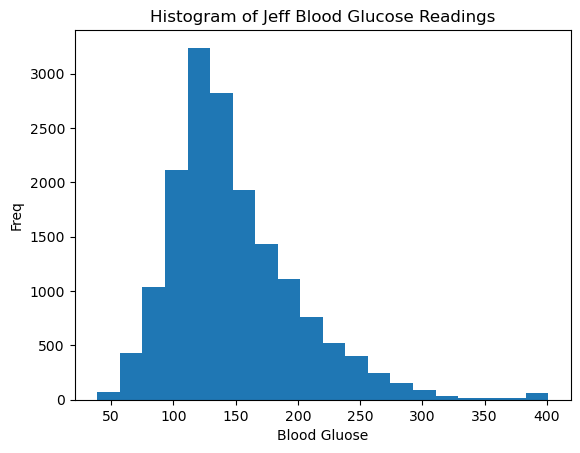

In [29]:
bins=20 #set number of bins
#call the function returning the output to the needed elements
bin_edges, bin_counts = histogram(jeff_merged_df["BG"],bins) 
plt.hist(jeff_merged_df["BG"], bins=bin_edges) #list what we are plotting
plt.xlabel('Blood Gluose') #labeling
plt.ylabel('Freq')
plt.title('Histogram of Jeff Blood Glucose Readings')
plt.show() #show the histogram

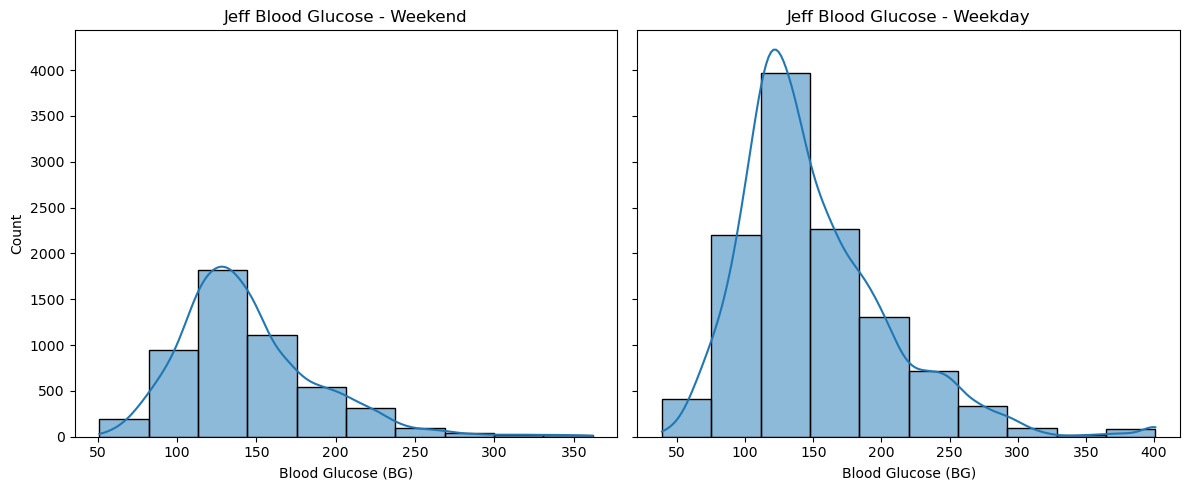

In [30]:
#split historgram by daytype
import seaborn as sns

# Unique categories in 'DayType'
categories = jeff_merged_df['DayType'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['DayType'] == category], x='BG', bins=10, kde=True, ax=ax)
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

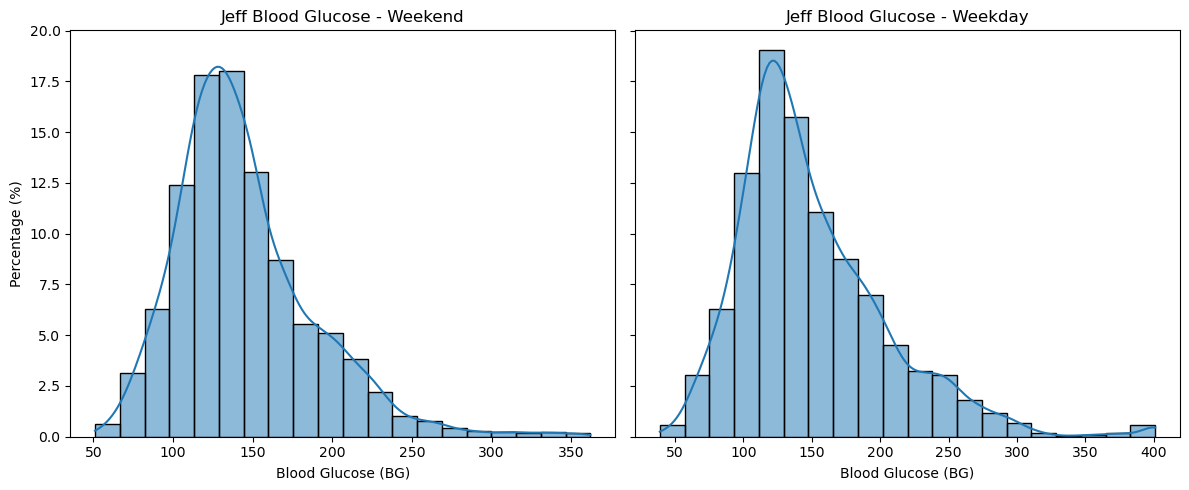

In [31]:
#let do by percent of obs now
categories = jeff_merged_df['DayType'].unique()

# Create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['DayType'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

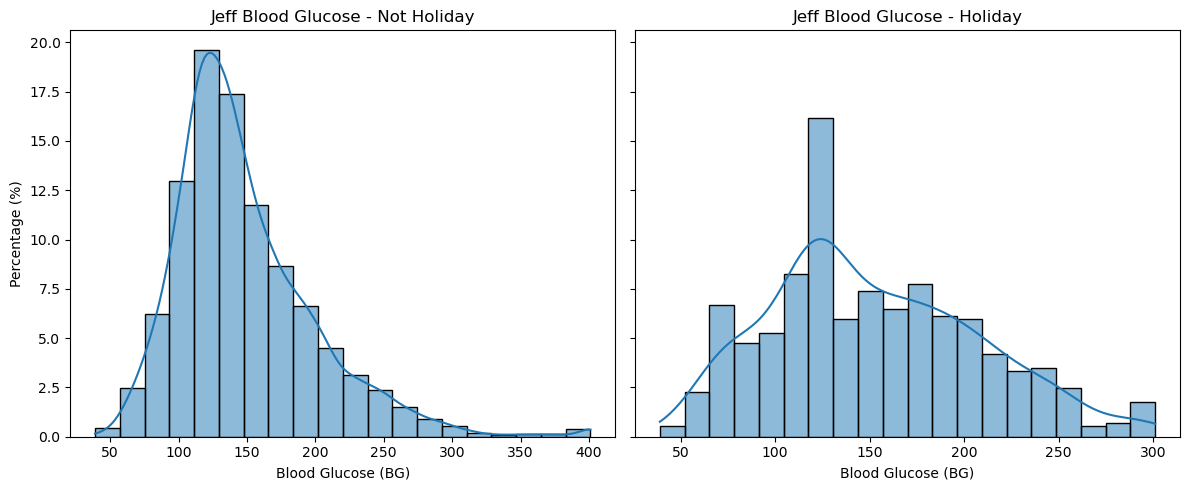

In [32]:
#look at base on holidays now
categories = jeff_merged_df['Holiday'].unique()

#create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['Holiday'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

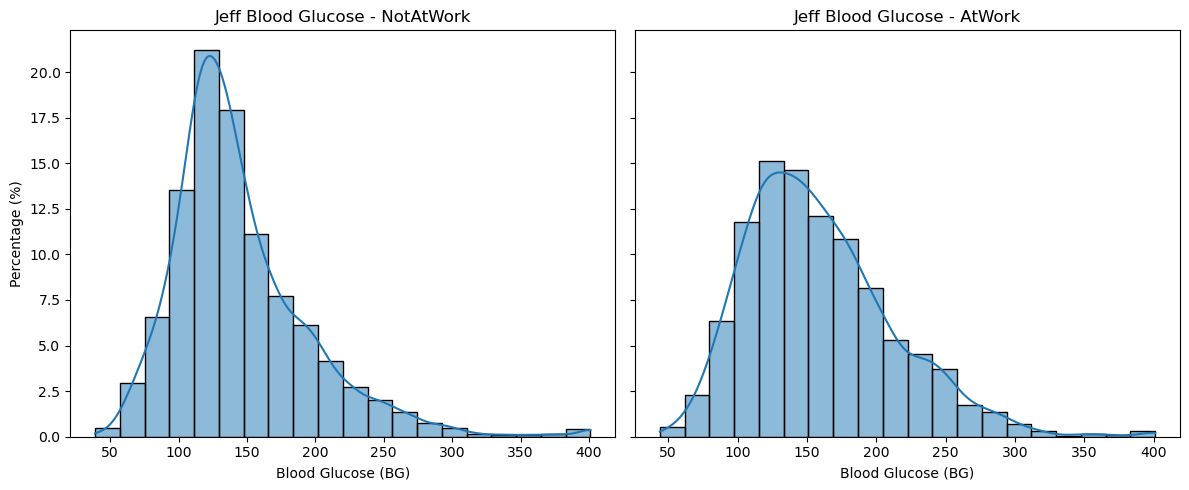

In [33]:
#do one on workdays vs not at work
categories = jeff_merged_df['WorkHours'].unique()

#create side-by-side histograms
fig, axes = plt.subplots(1, len(categories), figsize=(12, 5), sharey=True)

for ax, category in zip(axes, categories):
    sns.histplot(jeff_merged_df[jeff_merged_df['WorkHours'] == category], x='BG', bins=20, kde=True, ax=ax, stat='percent')
    ax.set_title(f'Jeff Blood Glucose - {category}')
    ax.set_xlabel('Blood Glucose (BG)')
    ax.set_ylabel('Percentage (%)')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [34]:
JeffAtWork_df = jeff_merged_df[jeff_merged_df["WorkHours"] == 'AtWork'] #crate new df with just entries at Work
JeffAtHome_df = jeff_merged_df[jeff_merged_df["WorkHours"] == 'NotAtWork'] #crate new df with just entries at Home
Jeff_BG_AtWork_avg = JeffAtWork_df["BG"].mean() #directly calculate mean for AtWork
print(f"Average BG at Work: {Jeff_BG_AtWork_avg}")
Jeff_BG_AtHome_avg = JeffAtHome_df["BG"].mean() #directly calculate mean for AtHome
print(f"Average BG at Home: {Jeff_BG_AtHome_avg}")
Jeff_Weekday_df = jeff_merged_df[jeff_merged_df["DayType"] == 'Weekday'] #crate new df with just entries on Weekdays
Jeff_Weekend_df = jeff_merged_df[jeff_merged_df["DayType"] == 'Weekend'] #crate new df with just entries on Weekend
Jeff_BG_Weekday_avg = Jeff_Weekday_df["BG"].mean() #directly calculate mean for Weekday
print(f"Average BG on Weekdays: {Jeff_BG_Weekday_avg}")
Jeff_BG_Weekend_avg = Jeff_Weekend_df["BG"].mean() #directly calculate mean for Weekend
print(f"Average BG on Weekend: {Jeff_BG_Weekend_avg}")

Average BG at Work: 159.1080029189978
Average BG at Home: 145.0439134646432
Average BG on Weekdays: 150.24932059261857
Average BG on Weekend: 144.737431264729


In [170]:
Jeff_BG_AtWork_std = JeffAtWork_df["BG"].std() #directly calculate mean for AtWork
print(f"Std Dev BG at Work: {Jeff_BG_AtWork_std}")
Jeff_BG_AtHome_std = JeffAtHome_df["BG"].std() #directly calculate mean for AtHome
print(f"Std Dev BG at Home: {Jeff_BG_AtHome_std}")

Std Dev BG at Work: 53.51015558772811
Std Dev BG at Home: 50.55045358889203


In [171]:
#run a t-test on a sample for workhours
from scipy.stats import ttest_ind
# Subset BG values based on WorkHours
Jeff_BG_AtWork = JeffAtWork_df[JeffAtWork_df["WorkHours"] == "AtWork"]["BG"]
Jeff_BG_NotAtWork = JeffAtHome_df[JeffAtHome_df["WorkHours"] == "NotAtWork"]["BG"]

sample_size = 500  #sample size
Jeff_BG_AtWork_sample = Jeff_BG_AtWork.sample(n=sample_size, random_state=65)
Jeff_BG_NotAtWork_sample = Jeff_BG_NotAtWork.sample(n=sample_size, random_state=65)

t_stat_sample, p_value_sample = ttest_ind(Jeff_BG_AtWork_sample, Jeff_BG_NotAtWork_sample, equal_var=False)

print(f"Sampled Work NotWork T-statistic: {t_stat_sample:.4f}")
print(f"Sampled Work NotWork P-value: {p_value_sample:.4f}")

Sampled Work NotWork T-statistic: 4.0245
Sampled Work NotWork P-value: 0.0001


In [35]:
jeff_merged_df.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,Target,CorrectionFactor,CarbRatio,DayType,Holiday,EventTimeTimePart,WorkHours,MinTarget,MaxTarget,InTarget
8197,EGV,170,2025-01-11,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:00:00,NotAtWork,70,150,No
8198,EGV,164,2025-01-11,1900-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:05:00,NotAtWork,70,150,No
8199,EGV,169,2025-01-11,1900-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:10:00,NotAtWork,70,150,No
8200,EGV,169,2025-01-11,1900-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:15:00,NotAtWork,70,150,No
8201,EGV,164,2025-01-11,1900-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:20:00,NotAtWork,70,150,No


In [36]:
#get some stats
jeff_merged_df.describe()

,BG,EventDate,RoundedTime,BGEvent,InsulinDelivered,FoodDelivered,CorrectionDelivered,CarbSize,Target,CorrectionFactor,CarbRatio,MinTarget,MaxTarget
count,16499.000000,16499,16499,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,16499.0,16499.0
mean,148.548215,2025-02-08 09:23:48.959331072,1900-01-01 11:54:04.796654336,208.554017,4.345291,3.620748,0.179723,22.457064,99.335180,36.011080,3.609418,70.0,150.0
min,39.000000,2025-01-11 00:00:00,1900-01-01 00:00:00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.0,150.0
25%,114.000000,2025-01-25 00:00:00,1900-01-01 05:55:00,182.000000,1.000000,0.000000,0.000000,0.000000,110.000000,36.000000,0.000000,70.0,150.0
50%,137.000000,2025-02-09 00:00:00,1900-01-01 11:50:00,202.000000,2.000000,0.670000,0.000000,5.000000,110.000000,36.000000,5.000000,70.0,150.0
75%,174.000000,2025-02-23 00:00:00,1900-01-01 17:50:00,230.000000,5.000000,5.000000,0.000000,28.000000,110.000000,46.000000,5.500000,70.0,150.0
max,401.000000,2025-03-09 00:00:00,1900-01-01 23:55:00,482.000000,24.300000,23.700000,5.150000,175.000000,110.000000,46.000000,8.000000,70.0,150.0
std,51.661657,NaN,NaN,59.485600,5.270121,5.458873,0.496330,35.559949,32.593474,12.584818,3.007365,0.0,0.0


In [ ]:
#not sure if needed
jeff_merged_df['Event_Time'] = jeff_merged_df['EventTime_x'].dt.time

In [ ]:
#not sure if needed
jeff_merged_df['Bolus_Time'] = jeff_merged_df['EventTime_y'].dt.time

In [ ]:
jeff_merged_df.describe()

In [37]:
from tabulate import tabulate

#get descriptive statistics
jeff_desc_stats = jeff_merged_df.describe()

#convert to tabulated format
jeff_table_str = tabulate(jeff_desc_stats, headers='keys', tablefmt='grid')

#save to a text file
with open("jeff_descriptive_stats.txt", "w") as f:
    f.write(jeff_table_str)

In [38]:
#write out to file
jeff_desc_stats.to_csv("jeff_descriptive_stats.csv")

In [39]:
jeff_merged_df.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,Target,CorrectionFactor,CarbRatio,DayType,Holiday,EventTimeTimePart,WorkHours,MinTarget,MaxTarget,InTarget
8197,EGV,170,2025-01-11,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:00:00,NotAtWork,70,150,No
8198,EGV,164,2025-01-11,1900-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:05:00,NotAtWork,70,150,No
8199,EGV,169,2025-01-11,1900-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:10:00,NotAtWork,70,150,No
8200,EGV,169,2025-01-11,1900-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:15:00,NotAtWork,70,150,No
8201,EGV,164,2025-01-11,1900-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Weekend,Not Holiday,00:20:00,NotAtWork,70,150,No


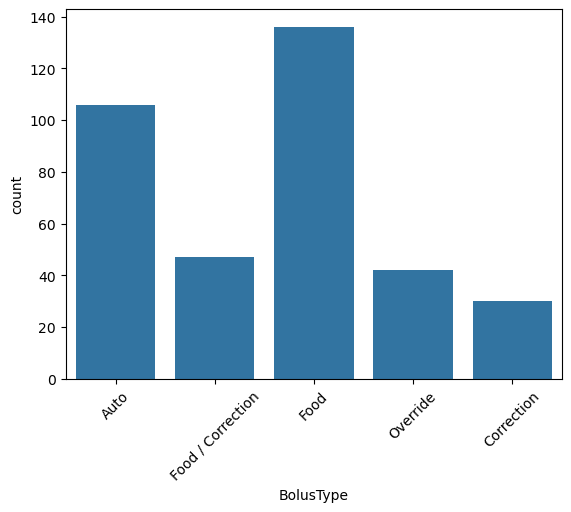

In [40]:
#visualize the bolus types
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=jeff_merged_df, x='BolusType')
plt.xticks(rotation=45) 
plt.show()

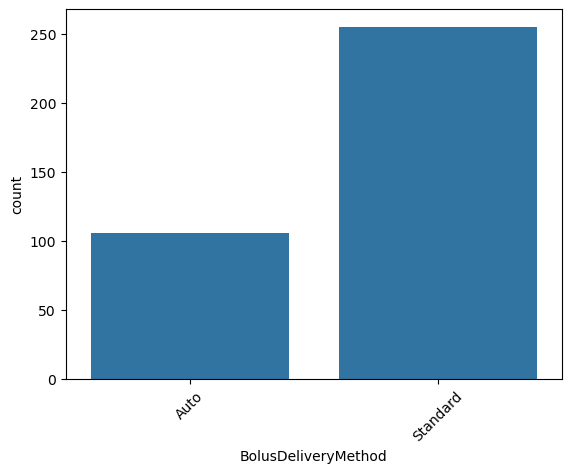

In [41]:
#look at delivery methods
sns.countplot(data=jeff_merged_df, x='BolusDeliveryMethod')
plt.xticks(rotation=45) 
plt.show()

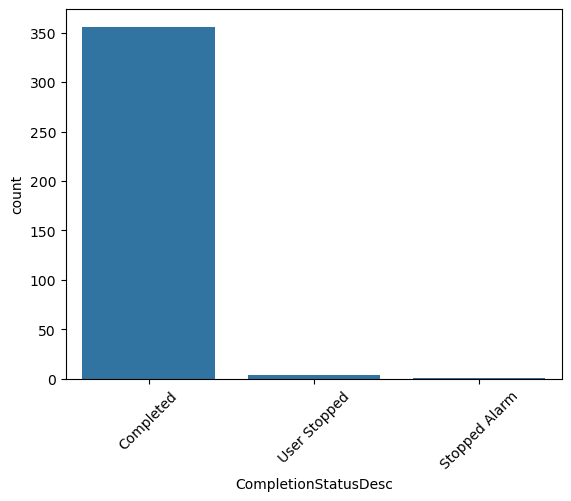

In [42]:
sns.countplot(data=jeff_merged_df, x='CompletionStatusDesc')
plt.xticks(rotation=45) 
plt.show()

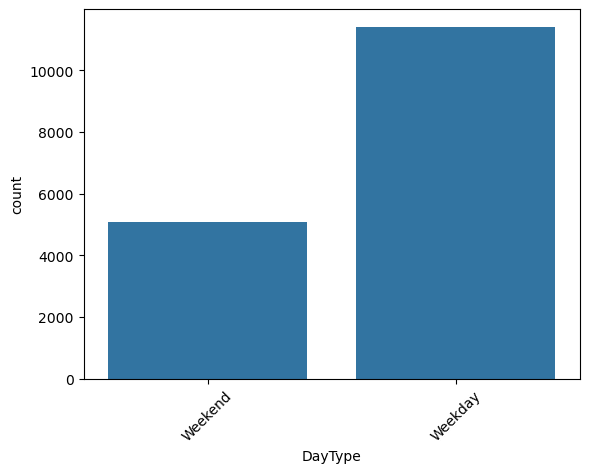

In [43]:
#observe daytypes
sns.countplot(data=jeff_merged_df, x='DayType')
plt.xticks(rotation=45) 
plt.show()

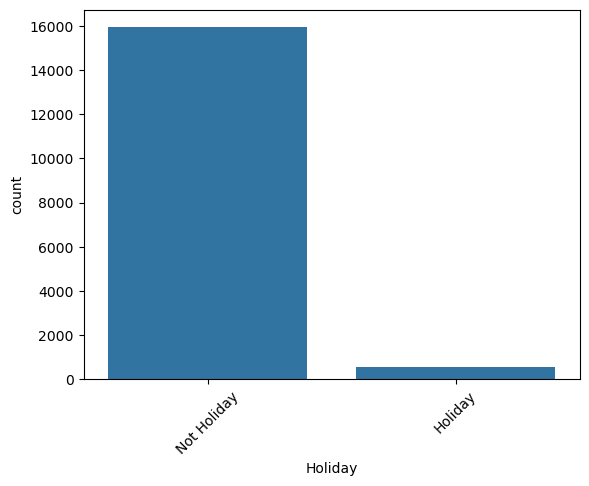

In [44]:
#look at holidays
sns.countplot(data=jeff_merged_df, x='Holiday')
plt.xticks(rotation=45) 
plt.show()

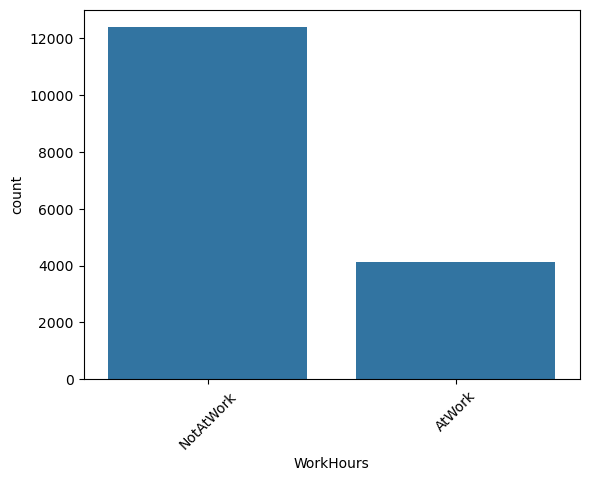

In [45]:
#check work hours
sns.countplot(data=jeff_merged_df, x='WorkHours')
plt.xticks(rotation=45) 
plt.show()

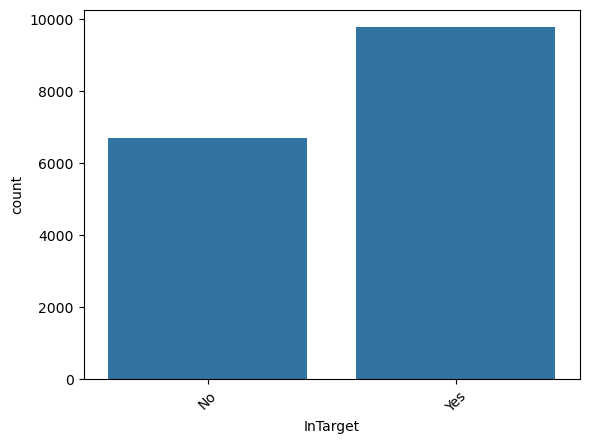

In [46]:
#observe inTarget measurements
sns.countplot(data=jeff_merged_df, x='InTarget')
plt.xticks(rotation=45) 
plt.show()

In [47]:
#print out freqs for each
for col in ['BolusType', 'BolusDeliveryMethod', 'CompletionStatusDesc','DayType','Holiday','WorkHours','InTarget']:
    print(f"Frequencies for {col}:")
    print(jeff_merged_df[col].value_counts())
    print("\n")

Frequencies for BolusType:
BolusType
Food                 136
Auto                 106
Food / Correction     47
Override              42
Correction            30
Name: count, dtype: int64


Frequencies for BolusDeliveryMethod:
BolusDeliveryMethod
Standard    255
Auto        106
Name: count, dtype: int64


Frequencies for CompletionStatusDesc:
CompletionStatusDesc
Completed        356
User Stopped       4
Stopped Alarm      1
Name: count, dtype: int64


Frequencies for DayType:
DayType
Weekday    11407
Weekend     5092
Name: count, dtype: int64


Frequencies for Holiday:
Holiday
Not Holiday    15929
Holiday          570
Name: count, dtype: int64


Frequencies for WorkHours:
WorkHours
NotAtWork    12388
AtWork        4111
Name: count, dtype: int64


Frequencies for InTarget:
InTarget
Yes    9783
No     6716
Name: count, dtype: int64




In [48]:
jeff_merged_df.to_csv("jeff_merged_df.csv", index=False)

In [49]:
import pandas as pd

#Convert EventTimeTimePart to timedelta
jeff_merged_df['EventTimeTimePart'] = pd.to_timedelta(jeff_merged_df['EventTimeTimePart'].astype(str))

# Convert EventDate to datetime
jeff_merged_df['EventDate'] = pd.to_datetime(jeff_merged_df['EventDate'])

#step 1: Create a new dataframe with only rows where CarbSize > 0
jeff_Food_eaten = jeff_merged_df[jeff_merged_df['CarbSize'] > 0].copy()

#Step 2: Aggregate total CarbSize per EventDate
jeff_total_carbs_per_day = jeff_Food_eaten.groupby('EventDate')['CarbSize'].sum().reset_index()
jeff_total_carbs_per_day.rename(columns={'CarbSize': 'TotalCarbs'}, inplace=True)

#step 3: Define time ranges
def categorize_time_range(time):
    if pd.Timedelta('05:00:00') <= time < pd.Timedelta('10:00:00'):
        return 'Morning (5-10 AM)'
    elif pd.Timedelta('10:00:00') <= time < pd.Timedelta('14:00:00'):
        return 'Midday (10 AM - 2 PM)'
    elif pd.Timedelta('14:00:00') <= time < pd.Timedelta('17:00:00'):
        return 'Afternoon (2-5 PM)'
    elif pd.Timedelta('17:00:00') <= time < pd.Timedelta('22:00:00'):
        return 'Evening (5-10 PM)'
    else:
        return 'Other'

#run the function to categorize time range
jeff_Food_eaten['TimeRange'] = jeff_Food_eaten['EventTimeTimePart'].apply(categorize_time_range)

#sep 4: Aggregate total carbs per EventDate and TimeRange
carb_distribution = (
    jeff_Food_eaten.groupby(['EventDate', 'TimeRange'])['CarbSize']
    .sum()
    .reset_index()
    .pivot(index='EventDate', columns='TimeRange', values='CarbSize')
    .fillna(0)  # Fill Na values with 0 for missing time slots
)

# Display results
print(carb_distribution)

TimeRange   Afternoon (2-5 PM)  Evening (5-10 PM)  Midday (10 AM - 2 PM)  \
EventDate                                                                  
2025-01-11                15.0               33.0                   80.0   
2025-01-12                76.0               30.0                    0.0   
2025-01-13                 8.0              115.0                  175.0   
2025-01-14                 0.0               73.0                  110.0   
2025-01-15                 0.0               80.0                  125.0   
2025-01-16                31.0                0.0                  155.0   
2025-01-17                74.0               70.0                  145.0   
2025-01-18                15.0               55.0                  155.0   
2025-01-19                55.0                0.0                    0.0   
2025-01-20                 5.0               78.0                  120.0   
2025-01-21                38.0               45.0                  155.0   
2025-01-22  

In [50]:
#look at dataframe
jeff_Food_eaten.to_csv("jeff_Food_eaten.csv", index=False)

In [51]:
#count days where carbs were consumed in each time range
carb_days = (carb_distribution > 0).sum()

#Total number of days in the dataset
total_days = carb_distribution.shape[0]

# Calc percentage of days with carbs for each time range
percent_days_with_carbs = (carb_days / total_days) * 100

#look at results
print(percent_days_with_carbs)

jeff_percent_days_df = pd.DataFrame(percent_days_with_carbs).reset_index()
jeff_percent_days_df.columns = ['TimeRange', 'PercentDaysWithCarbs']

#look at results
jeff_percent_days_df.to_csv('jeff_percent_days_with_carbs.csv', index=False)


TimeRange
Afternoon (2-5 PM)       80.000000
Evening (5-10 PM)        90.000000
Midday (10 AM - 2 PM)    93.333333
Morning (5-10 AM)        63.333333
Other                     6.666667
dtype: float64
               TimeRange  PercentDaysWithCarbs
0     Afternoon (2-5 PM)             80.000000
1      Evening (5-10 PM)             90.000000
2  Midday (10 AM - 2 PM)             93.333333
3      Morning (5-10 AM)             63.333333
4                  Other              6.666667


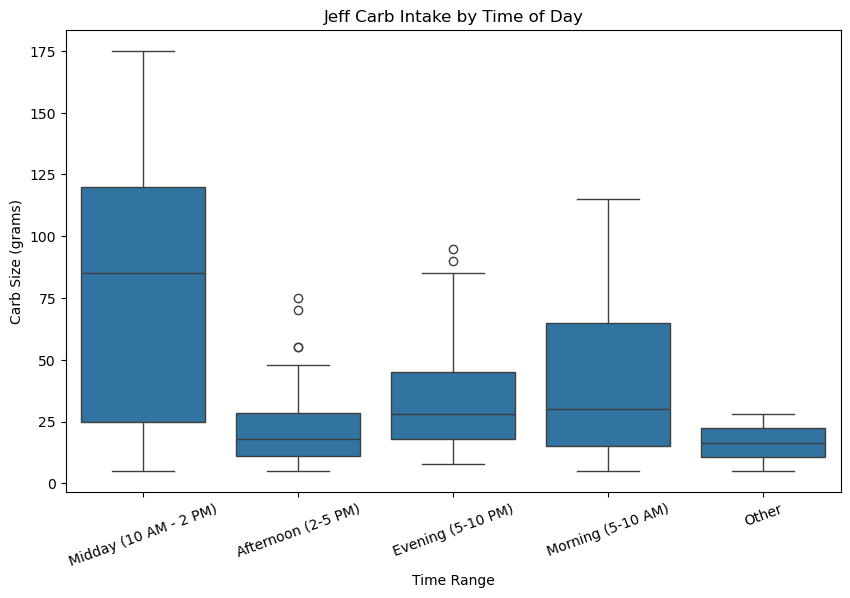

In [52]:
#do a boxplot of carb intake by hours
plt.figure(figsize=(10, 6))
sns.boxplot(data=jeff_Food_eaten, x='TimeRange', y='CarbSize')

# Labels and title
plt.xlabel("Time Range")
plt.ylabel("Carb Size (grams)")
plt.title("Jeff Carb Intake by Time of Day")
plt.xticks(rotation=20)

plt.show()

In [53]:
#look at the stats for numeric cols of interest
stats = jeff_Food_eaten[['BG', 'InsulinDelivered', 'FoodDelivered', 'CorrectionDelivered', 'CarbSize']].describe()

# Display the results
print(stats)

#look at full stats to pretty it up
stats.to_csv('jeff_food_eaten_descriptive_stats.csv', index=False)

               BG  InsulinDelivered  FoodDelivered  CorrectionDelivered  \
count  183.000000        183.000000     183.000000           183.000000   
mean   200.994536          7.312678       7.142568             0.168743   
std     60.360410          5.866034       5.800913             0.382969   
min     86.000000          0.230000       0.230000             0.000000   
25%    161.500000          3.000000       2.730000             0.000000   
50%    201.000000          5.000000       5.000000             0.000000   
75%    232.000000          9.990000       9.920000             0.065000   
max    401.000000         24.300000      23.700000             2.500000   

         CarbSize  
count  183.000000  
mean    44.300546  
std     39.092625  
min      5.000000  
25%     15.000000  
50%     28.000000  
75%     65.000000  
max    175.000000  


In [54]:
#ensure EventTimeTimePart is a timedelta for proper calculations
jeff_merged_df['EventTimeTimePart'] = pd.to_timedelta(jeff_merged_df['EventTimeTimePart'].astype(str))

#cnvert EventDate to datetime for merging
jeff_merged_df['EventDate'] = pd.to_datetime(jeff_merged_df['EventDate'])


In [55]:
#create a subset of only "Food" BolusType entries
Jeff_food_bolus_df = jeff_merged_df[jeff_merged_df['BolusType'].str.contains('Food', case=False, na=False)].copy()



#sort both datasets properly (EventDate first, then EventTimeTimePart)
jeff_merged_df = jeff_merged_df.sort_values(['EventDate', 'EventTimeTimePart']).reset_index(drop=True)
Jeff_food_bolus_df = Jeff_food_bolus_df.sort_values(['EventDate', 'EventTimeTimePart']).reset_index(drop=True)


In [56]:
#see how it looks
jeff_merged_df.to_csv("jeff_merged_df.csv", index=False)

In [57]:
print(jeff_merged_df.head())

  Description   BG  EventDate         RoundedTime Type BolusType  \
0         EGV  170 2025-01-11 1900-01-01 00:00:00  NaN       NaN   
1         EGV  164 2025-01-11 1900-01-01 00:05:00  NaN       NaN   
2         EGV  169 2025-01-11 1900-01-01 00:10:00  NaN       NaN   
3         EGV  169 2025-01-11 1900-01-01 00:15:00  NaN       NaN   
4         EGV  164 2025-01-11 1900-01-01 00:20:00  NaN       NaN   

  BolusDeliveryMethod  BGEvent  InsulinDelivered  FoodDelivered  ...  Target  \
0                 NaN      NaN               NaN            NaN  ...     NaN   
1                 NaN      NaN               NaN            NaN  ...     NaN   
2                 NaN      NaN               NaN            NaN  ...     NaN   
3                 NaN      NaN               NaN            NaN  ...     NaN   
4                 NaN      NaN               NaN            NaN  ...     NaN   

  CorrectionFactor  CarbRatio  DayType      Holiday  EventTimeTimePart  \
0              NaN        NaN  Weeke

In [58]:
Jeff_food_bolus_df.to_csv("Jeff_food_bolus_df.csv", index=False)

In [59]:
#ensure EventDateTime is in datetime format
jeff_merged_df['EventDate'] = pd.to_datetime(jeff_merged_df['EventDate'])

In [60]:
#Extract only the time part from RoundedTime
jeff_merged_df['RoundedTime'] = pd.to_datetime(jeff_merged_df['RoundedTime']).dt.time

In [61]:
#Combine EventDate with RoundedTime
jeff_merged_df['EventDateTime'] = jeff_merged_df.apply(
    lambda row: pd.Timestamp.combine(row['EventDate'], row['RoundedTime']), axis=1
)
print(jeff_merged_df[['EventDate', 'RoundedTime', 'EventDateTime']].head())

   EventDate RoundedTime       EventDateTime
0 2025-01-11    00:00:00 2025-01-11 00:00:00
1 2025-01-11    00:05:00 2025-01-11 00:05:00
2 2025-01-11    00:10:00 2025-01-11 00:10:00
3 2025-01-11    00:15:00 2025-01-11 00:15:00
4 2025-01-11    00:20:00 2025-01-11 00:20:00


In [62]:
print(jeff_merged_df.columns)

Index(['Description', 'BG', 'EventDate', 'RoundedTime', 'Type', 'BolusType',
       'BolusDeliveryMethod', 'BGEvent', 'InsulinDelivered', 'FoodDelivered',
       'CorrectionDelivered', 'CompletionStatusDesc', 'CarbSize', 'Target',
       'CorrectionFactor', 'CarbRatio', 'DayType', 'Holiday',
       'EventTimeTimePart', 'WorkHours', 'MinTarget', 'MaxTarget', 'InTarget',
       'EventDateTime'],
      dtype='object')


In [63]:
#create a copy of df for use on futher refinement of df
jeff_merged_df2 = jeff_merged_df.copy()

In [64]:
#calculate rolling metrics
jeff_merged_df2['Avg_BG_2hrs'] = jeff_merged_df2['BG'].rolling(window=24, min_periods=1).mean()
jeff_merged_df2['Sum_Insulin_2hrs'] = jeff_merged_df2['InsulinDelivered'].rolling(window=24, min_periods=1).sum().fillna(0)
jeff_merged_df2['Sum_CarbSize_2hrs'] = jeff_merged_df2['CarbSize'].rolling(window=24, min_periods=1).sum().fillna(0)


In [65]:
from pandas import Timedelta

#identify rows where InsulinDelivered > 0
insulin_delivered_mask = jeff_merged_df2['InsulinDelivered'] > 0

#create LastInsulinTime column, setting it only where InsulinDelivered > 0
jeff_merged_df2['LastInsulinTime'] = jeff_merged_df2['EventDateTime'].where(insulin_delivered_mask)

# Initialize first row LastInsulinTime to EventDateTime for 4 hrs
jeff_merged_df2.loc[0, 'LastInsulinTime'] = jeff_merged_df2.loc[0, 'EventDateTime'] - Timedelta(hours=4)

#forward-fill LastInsulinTime to ensure all rows have a value
jeff_merged_df2['LastInsulinTime'] = jeff_merged_df2['LastInsulinTime'].ffill()

#compute the time difference in hours
jeff_merged_df2['TimeSinceLastInsulin'] = (jeff_merged_df2['EventDateTime'] - jeff_merged_df2['LastInsulinTime']).dt.total_seconds() / 3600


In [66]:
#identify rows where FoodDelivered > 0
food_delivered_mask = jeff_merged_df2['FoodDelivered'] > 0

#create LastFoodTime column, setting it only where FoodDelivered > 0
jeff_merged_df2['LastFoodTime'] = jeff_merged_df2['EventDateTime'].where(food_delivered_mask)

# Initialize first rows LastFoodTime to EventDateTime - 4 hrs
jeff_merged_df2.loc[0, 'LastFoodTime'] = jeff_merged_df2.loc[0, 'EventDateTime'] - Timedelta(hours=4)

# forward-fill LastFoodTime to ensure all rows have a value
jeff_merged_df2['LastFoodTime'] = jeff_merged_df2['LastFoodTime'].ffill()

#compute the time difference in hours
jeff_merged_df2['TimeSinceLastFood'] = (jeff_merged_df2['EventDateTime'] - jeff_merged_df2['LastFoodTime']).dt.total_seconds() / 3600


In [67]:
jeff_merged_df2.to_csv("jeff_merged_df2.csv", index=False)

In [68]:
print(jeff_merged_df2.dtypes)

Description                      object
BG                                int64
EventDate                datetime64[ns]
RoundedTime                      object
Type                             object
BolusType                        object
BolusDeliveryMethod              object
BGEvent                         float64
InsulinDelivered                float64
FoodDelivered                   float64
CorrectionDelivered             float64
CompletionStatusDesc             object
CarbSize                        float64
Target                          float64
CorrectionFactor                float64
CarbRatio                       float64
DayType                          object
Holiday                          object
EventTimeTimePart       timedelta64[ns]
WorkHours                        object
MinTarget                         int64
MaxTarget                         int64
InTarget                         object
EventDateTime            datetime64[ns]
Avg_BG_2hrs                     float64


In [69]:
#create a column to identify if he may have forgot to bolus for food
jeff_merged_df2['LikelyMissedRecentBolus'] = (
    ((jeff_merged_df2['TimeSinceLastFood'] > 6) & 
     (jeff_merged_df2['EventDateTime'].dt.time >= pd.to_datetime('10:00:00').time()) & 
     (jeff_merged_df2['EventDateTime'].dt.time <= pd.to_datetime('23:59:59').time()))
    .astype(int)
)

In [70]:
#column for inTarget
jeff_merged_df2['InBGTarget'] = (
    ((jeff_merged_df2['BG'] > jeff_merged_df2['MinTarget']) & 
     (jeff_merged_df2['BG'] < jeff_merged_df2['MaxTarget']))
    .astype(int)
)

In [71]:
#create columns for delta in BG over intervals
jeff_merged_df2['BG_Delta_15'] = jeff_merged_df2['BG'] - jeff_merged_df2['BG'].shift(3)
jeff_merged_df2['BG_Delta_60'] = jeff_merged_df2['BG'] - jeff_merged_df2['BG'].shift(12)
jeff_merged_df2['BG_Delta_120'] = jeff_merged_df2['BG'] - jeff_merged_df2['BG'].shift(24)

#Fill NaN values (caused by shifting) with 0
jeff_merged_df2[['BG_Delta_15', 'BG_Delta_60', 'BG_Delta_120']] = jeff_merged_df2[['BG_Delta_15', 'BG_Delta_60', 'BG_Delta_120']].fillna(0)


In [72]:
#create PatientID column with a constant value of 2
jeff_merged_df2['PatientID'] = 2

#determine the midpoint of the dataset
midpoint = len(jeff_merged_df2) // 2

#create ObsMonth with 1 for the first half and 2 for the second half
jeff_merged_df2['ObsMonth'] = 1
jeff_merged_df2.loc[midpoint:, 'ObsMonth'] = 2


In [74]:
jeff_merged_df2.to_csv("jeff_merged_df2.csv", index=False)

In [75]:
# Define a column to check if BG is in target range to use for dependent var
jeff_merged_df2['FutureInTarget'] = (
    (jeff_merged_df2['BG'] >= jeff_merged_df2['MinTarget']) & 
    (jeff_merged_df2['BG'] <= jeff_merged_df2['MaxTarget'])
).astype(int)


#create FutureBGInTarget by checking the sum of target-range BG values in the next 12 to 36 rows (1-3 hours later)
jeff_merged_df2['FutureBGInTarget'] = (
    jeff_merged_df2['FutureInTarget']
    .rolling(window=36, min_periods=12)
    .sum()
    .shift(-12)  # Shift to align with the start of the future window
    .ge(13)  # Check if at least 13 values (more than half) are in target
    .astype(int)  # Convert to 1 or 0
)

In [76]:
#create cols for sum of insulin over intervals
jeff_merged_df2['Sum_Insulin_1hrs'] = jeff_merged_df2['InsulinDelivered'].rolling(window=12, min_periods=1).sum().fillna(0)
jeff_merged_df2['Sum_Insulin_15min'] = jeff_merged_df2['InsulinDelivered'].rolling(window=3, min_periods=1).sum().fillna(0)


In [77]:
#create time for sleep times
bed_time = pd.to_datetime('22:00:00', format='%H:%M:%S').time()
wake_time = pd.to_datetime('05:30:00', format='%H:%M:%S').time()


In [78]:
#Create Wake hours column based on conditions
#Convert Timedelta to string and extract only the time portion
jeff_merged_df2['EventTimeTimePart'] = jeff_merged_df2['EventTimeTimePart'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')[0]

#convert extracted time strings to datetime.time
jeff_merged_df2['EventTimeTimePart'] = pd.to_datetime(jeff_merged_df2['EventTimeTimePart'], format='%H:%M:%S').dt.time

jeff_merged_df2['WakeHours'] = jeff_merged_df2.apply(
    lambda obs: 'Awake' if wake_time <= obs['EventTimeTimePart'] <= bed_time else 'Asleep',
    axis=1
)

In [79]:
#take a look at dataset before starting modeling section
jeff_merged_df2.to_csv("jeff_merged_df2.csv", index=False)

## Data is prepped for Jeff - Section now to to the modeling work

In [80]:
#bring in all needed libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [111]:
# **Train-Test Split: First Month (Train), Second Month (Test)**
jeff_train = jeff_merged_df2[jeff_merged_df2["ObsMonth"] == 1]
jeff_test = jeff_merged_df2[jeff_merged_df2["ObsMonth"] == 2]


In [112]:
jeff_train.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,BG_Delta_15,BG_Delta_60,BG_Delta_120,PatientID,ObsMonth,FutureInTarget,FutureBGInTarget,Sum_Insulin_1hrs,Sum_Insulin_15min,WakeHours
0,EGV,170,2025-01-11,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2,1,0,0,0.0,0.0,Asleep
1,EGV,164,2025-01-11,00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2,1,0,0,0.0,0.0,Asleep
2,EGV,169,2025-01-11,00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2,1,0,0,0.0,0.0,Asleep
3,EGV,169,2025-01-11,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0.0,0.0,2,1,0,0,0.0,0.0,Asleep
4,EGV,164,2025-01-11,00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2,1,0,0,0.0,0.0,Asleep


In [113]:
jeff_test.head()

,Description,BG,EventDate,RoundedTime,Type,BolusType,BolusDeliveryMethod,BGEvent,InsulinDelivered,FoodDelivered,...,BG_Delta_15,BG_Delta_60,BG_Delta_120,PatientID,ObsMonth,FutureInTarget,FutureBGInTarget,Sum_Insulin_1hrs,Sum_Insulin_15min,WakeHours
8249,EGV,109,2025-02-09,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.0,-65.0,-71.0,2,2,1,1,0.0,0.0,Asleep
8250,EGV,108,2025-02-09,00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,-66.0,-72.0,2,2,1,1,0.0,0.0,Asleep
8251,EGV,99,2025-02-09,00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.0,-72.0,-78.0,2,2,1,1,0.0,0.0,Asleep
8252,EGV,97,2025-02-09,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.0,-64.0,-81.0,2,2,1,1,0.0,0.0,Asleep
8253,EGV,93,2025-02-09,00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,...,-15.0,-56.0,-87.0,2,2,1,1,0.0,0.0,Asleep


In [114]:
#list columns for dependent vars
Jeff_X_train = jeff_train[["BG", "BG_Delta_120", "BG_Delta_60", "BG_Delta_15", "InBGTarget", "LikelyMissedRecentBolus",
                 "TimeSinceLastFood", "TimeSinceLastInsulin", "Sum_CarbSize_2hrs", "Sum_Insulin_2hrs", "Sum_Insulin_1hrs",
                "Sum_Insulin_15min","Avg_BG_2hrs", "WorkHours","Holiday","DayType","WakeHours"]]


In [115]:
#create dummy vars
Jeff_X_train = pd.get_dummies(Jeff_X_train, drop_first=True)
print(Jeff_X_train.dtypes)

BG                           int64
BG_Delta_120               float64
BG_Delta_60                float64
BG_Delta_15                float64
InBGTarget                   int32
LikelyMissedRecentBolus      int32
TimeSinceLastFood          float64
TimeSinceLastInsulin       float64
Sum_CarbSize_2hrs          float64
Sum_Insulin_2hrs           float64
Sum_Insulin_1hrs           float64
Sum_Insulin_15min          float64
Avg_BG_2hrs                float64
WorkHours_NotAtWork           bool
Holiday_Not Holiday           bool
DayType_Weekend               bool
WakeHours_Awake               bool
dtype: object


In [116]:
#dependent var
Jeff_Y_train = jeff_train["FutureBGInTarget"]

In [117]:
#list columns for dependent vars
Jeff_X_test = jeff_test[["BG", "BG_Delta_120", "BG_Delta_60", "BG_Delta_15", "InBGTarget", "LikelyMissedRecentBolus",
                 "TimeSinceLastFood", "TimeSinceLastInsulin", "Sum_CarbSize_2hrs", "Sum_Insulin_2hrs", "Sum_Insulin_1hrs",
                "Sum_Insulin_15min","Avg_BG_2hrs", "WorkHours","Holiday","DayType","WakeHours"]]


In [118]:
#create dummy vars
Jeff_X_test = pd.get_dummies(Jeff_X_test, drop_first=True)
print(Jeff_X_test.dtypes)

BG                           int64
BG_Delta_120               float64
BG_Delta_60                float64
BG_Delta_15                float64
InBGTarget                   int32
LikelyMissedRecentBolus      int32
TimeSinceLastFood          float64
TimeSinceLastInsulin       float64
Sum_CarbSize_2hrs          float64
Sum_Insulin_2hrs           float64
Sum_Insulin_1hrs           float64
Sum_Insulin_15min          float64
Avg_BG_2hrs                float64
WorkHours_NotAtWork           bool
Holiday_Not Holiday           bool
DayType_Weekend               bool
WakeHours_Awake               bool
dtype: object


In [119]:
#dependent var
Jeff_Y_test = jeff_test["FutureBGInTarget"]


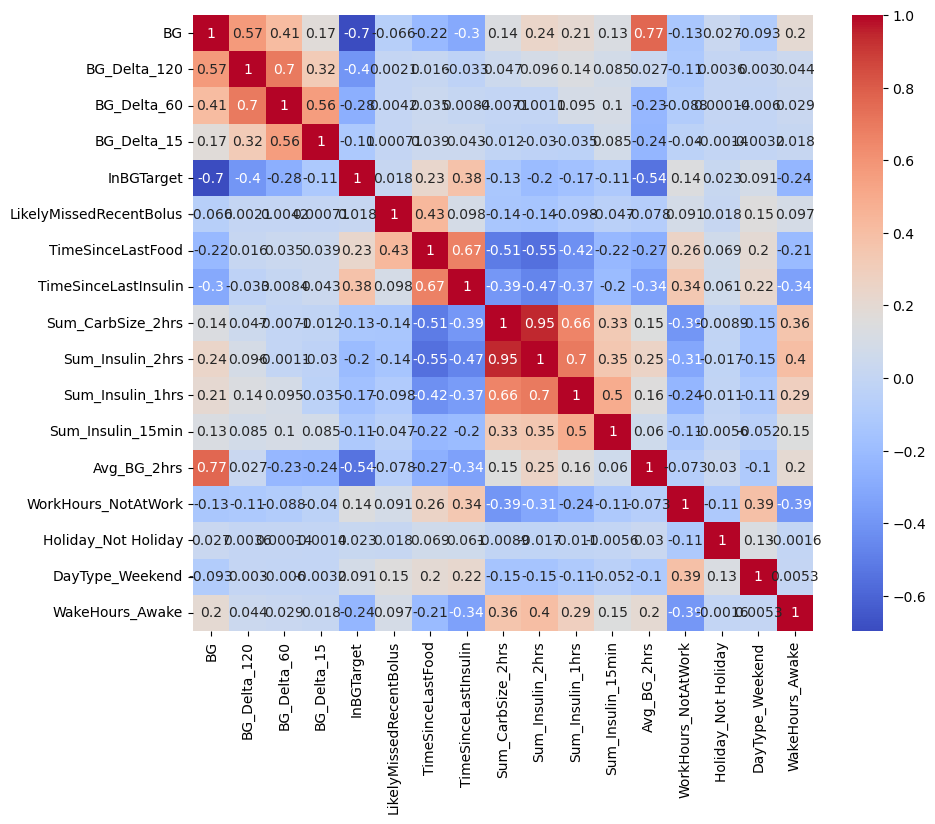

In [120]:
#do heatmap for correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(Jeff_X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [121]:
#standardize all vars in train and test using this handy function
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

#initialize the scaler
scaler = StandardScaler()

#Fit and transform the training data
Jeff_X_train_scaled = scaler.fit_transform(Jeff_X_train)
Jeff_X_test_scaled = scaler.transform(Jeff_X_test)  # Only transform test data (no fitting)

#Convert back to DataFrame to keep feature names
Jeff_X_train_scaled = pd.DataFrame(Jeff_X_train_scaled, columns=Jeff_X_train.columns)
Jeff_X_test_scaled = pd.DataFrame(Jeff_X_test_scaled, columns=Jeff_X_test.columns)

#Now use Jeff_X_train_scaled for the statsmodels regression
Jeff_X_train_sm = sm.add_constant(Jeff_X_train_scaled)
logit_model = sm.Logit(Jeff_Y_train, Jeff_X_train_sm)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.140056
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8249
Model:                          Logit   Df Residuals:                     8231
Method:                           MLE   Df Model:                           17
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7679
Time:                        20:35:26   Log-Likelihood:                -1155.3
converged:                       True   LL-Null:                       -4978.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.6554      0.096     27.785      0.000       2.468  

In [122]:
# List fields that are insignificamnt to drop
drop_these = ['Sum_CarbSize_2hrs', 'BG_Delta_15', 'BG_Delta_60','Sum_Insulin_15min',
    'Sum_Insulin_2hrs','DayType_Weekend','TimeSinceLastFood','WorkHours_NotAtWork']  
drop_this_too = ['LikelyMissedRecentBolus']
and_this = ['Sum_Insulin_1hrs']
# Drop from both train and test sets
Jeff_X_train_scaled = Jeff_X_train_scaled.drop(columns=drop_these)
Jeff_X_test_scaled = Jeff_X_test_scaled.drop(columns=drop_these)
Jeff_X_train_scaled = Jeff_X_train_scaled.drop(columns=drop_this_too)
Jeff_X_test_scaled = Jeff_X_test_scaled.drop(columns=drop_this_too)
Jeff_X_train_scaled = Jeff_X_train_scaled.drop(columns=and_this)
Jeff_X_test_scaled = Jeff_X_test_scaled.drop(columns=and_this)

In [123]:
# Add intercept (constant)
Jeff_X_train_sm = sm.add_constant(Jeff_X_train_scaled)

# Fit model again
logit_model = sm.Logit(Jeff_Y_train, Jeff_X_train_sm)
result = logit_model.fit()

# Print new summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.141320
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8249
Model:                          Logit   Df Residuals:                     8241
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7658
Time:                        20:39:24   Log-Likelihood:                -1165.7
converged:                       True   LL-Null:                       -4978.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6403      0.094     28.185      0.000       2.457       2.82

In [124]:
selected_features = ['BG', 'BG_Delta_120','InBGTarget','TimeSinceLastInsulin','Avg_BG_2hrs',
                     'Holiday_Not Holiday','WakeHours_Awake']  # List kept features

Jeff_X_train_selected = Jeff_X_train[selected_features]
Jeff_X_test_selected = Jeff_X_test[selected_features]

In [125]:
Jeff_X_train_selected.head(20)

,BG,BG_Delta_120,InBGTarget,TimeSinceLastInsulin,Avg_BG_2hrs,Holiday_Not Holiday,WakeHours_Awake
0,170,0.0,0,4.000000,170.000000,True,False
1,164,0.0,0,4.083333,167.000000,True,False
2,169,0.0,0,4.166667,167.666667,True,False
3,169,0.0,0,4.250000,168.000000,True,False
4,164,0.0,0,4.333333,167.200000,True,False
5,157,0.0,0,4.416667,165.500000,True,False
6,147,0.0,1,4.500000,162.857143,True,False
7,137,0.0,1,4.583333,159.625000,True,False
8,128,0.0,1,4.666667,156.111111,True,False
9,124,0.0,1,4.750000,152.900000,True,False


In [126]:
Jeff_X_test_selected.head(20)

,BG,BG_Delta_120,InBGTarget,TimeSinceLastInsulin,Avg_BG_2hrs,Holiday_Not Holiday,WakeHours_Awake
8249,109,-71.0,1,2.333333,151.333333,True,False
8250,108,-72.0,1,2.416667,148.333333,True,False
8251,99,-78.0,1,2.500000,145.083333,True,False
8252,97,-81.0,1,2.583333,141.708333,True,False
8253,93,-87.0,1,2.666667,138.083333,True,False
8254,99,-75.0,1,2.750000,134.958333,True,False
8255,103,-69.0,1,2.833333,132.083333,True,False
8256,110,-46.0,1,2.916667,130.166667,True,False
8257,117,-32.0,1,3.000000,128.833333,True,False
8258,123,-23.0,1,3.083333,127.875000,True,False


In [127]:
#fit and transform the training data
scaler = StandardScaler()
Jeff_X_train_scaled = scaler.fit_transform(Jeff_X_train_selected)
Jeff_X_test_scaled = scaler.transform(Jeff_X_test_selected) #transform only, not fitting

In [128]:
#convert back to DataFrame to keep feature names
Jeff_X_train_scaled = pd.DataFrame(Jeff_X_train_scaled, columns=Jeff_X_train_selected.columns)
Jeff_X_test_scaled = pd.DataFrame(Jeff_X_test_scaled, columns=Jeff_X_test_selected.columns)

#Now use Jeff_X_train_scaled for the statsmodels regression
Jeff_X_train_sm = sm.add_constant(Jeff_X_train_scaled)
logit_model = sm.Logit(Jeff_Y_train, Jeff_X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.141320
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8249
Model:                          Logit   Df Residuals:                     8241
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7658
Time:                        20:43:59   Log-Likelihood:                -1165.7
converged:                       True   LL-Null:                       -4978.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6403      0.094     28.185      0.000       2.457       2.82

In [129]:
#run the prediction
Jeff_Y_train_pred = result.predict(Jeff_X_train_sm)

Jeff_X_test_sm = sm.add_constant(Jeff_X_test_scaled)  # Add intercept to test data
Jeff_Y_test_pred = result.predict(Jeff_X_test_sm)

In [130]:
print(Jeff_X_test_scaled.dtypes)
print(Jeff_X_train_scaled.dtypes)

BG                      float64
BG_Delta_120            float64
InBGTarget              float64
TimeSinceLastInsulin    float64
Avg_BG_2hrs             float64
Holiday_Not Holiday     float64
WakeHours_Awake         float64
dtype: object
BG                      float64
BG_Delta_120            float64
InBGTarget              float64
TimeSinceLastInsulin    float64
Avg_BG_2hrs             float64
Holiday_Not Holiday     float64
WakeHours_Awake         float64
dtype: object


In [131]:
#looking at accuracuy
from sklearn.metrics import accuracy_score

#Predict on the test set
Jeff_Y_test_pred = result.predict(Jeff_X_test_sm)  
Jeff_Y_test_pred_binary = (Jeff_Y_test_pred >= 0.5).astype(int)  # Threshold at 0.5

#compare to train set
Jeff_Y_train_pred = result.predict(Jeff_X_train_sm)  
Jeff_Y_train_pred_binary = (Jeff_Y_train_pred >= 0.5).astype(int)  # Threshold at 0.5

train_accuracy = accuracy_score(Jeff_Y_train, Jeff_Y_train_pred_binary)
test_accuracy = accuracy_score(Jeff_Y_test, Jeff_Y_test_pred_binary)

print(f"Jeff Training Accuracy: {train_accuracy:.4f}")
print(f"Jeff Test Accuracy: {test_accuracy:.4f}")

Jeff Training Accuracy: 0.9400
Jeff Test Accuracy: 0.4193


In [110]:
#compare means
print("Feature Means:\n", Jeff_X_train_sm.mean() - Jeff_X_test_sm.mean())

#compare standard deviations
print("Feature Std Devs:\n", Jeff_X_train_sm.std() - Jeff_X_test_sm.std())

#check target variable balance
print("Train Target Distribution:\n", Jeff_Y_train.value_counts(normalize=True))
print("Test Target Distribution:\n", Jeff_Y_test.value_counts(normalize=True))

Feature Means:
 const                    0.000000
BG                       0.158291
BG_Delta_120             0.003266
InBGTarget              -0.079058
TimeSinceLastInsulin   -94.141191
Avg_BG_2hrs              0.178003
Holiday_Not Holiday     -0.003985
WakeHours_Awake         -0.006094
dtype: float64
Feature Std Devs:
 const                    0.000000
BG                       0.150298
BG_Delta_120             0.023295
InBGTarget               0.013411
TimeSinceLastInsulin   -57.123689
Avg_BG_2hrs              0.190675
Holiday_Not Holiday      0.010157
WakeHours_Awake          0.002481
dtype: float64
Train Target Distribution:
 FutureBGInTarget
1    0.70845
0    0.29155
Name: proportion, dtype: float64
Test Target Distribution:
 FutureBGInTarget
1    0.748848
0    0.251152
Name: proportion, dtype: float64


In [149]:
#run again
selected_features2 = ['InBGTarget','Avg_BG_2hrs','BG','WakeHours_Awake','Holiday_Not Holiday','BG_Delta_120']  # List kept features

Jeff_X_train_selected2 = Jeff_X_train[selected_features2]
Jeff_X_test_selected2 = Jeff_X_test[selected_features2]

In [150]:
#do transform
scaler = StandardScaler()
Jeff_X_train_scaled2 = scaler.fit_transform(Jeff_X_train_selected2)
Jeff_X_test_scaled2 = scaler.transform(Jeff_X_test_selected2) #transform only, not fitting

In [151]:
#convert back to DataFrame to keep feature names
Jeff_X_train_scaled2 = pd.DataFrame(Jeff_X_train_scaled2, columns=selected_features2)
Jeff_X_test_scaled2 = pd.DataFrame(Jeff_X_test_scaled2, columns=selected_features2)

# Now use Jeff_X_train_scaled for the statsmodels regression
Jeff_X_train_sm2 = sm.add_constant(Jeff_X_train_scaled2)
logit_model = sm.Logit(Jeff_Y_train, Jeff_X_train_sm2)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.141891
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8249
Model:                          Logit   Df Residuals:                     8242
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7649
Time:                        21:37:52   Log-Likelihood:                -1170.5
converged:                       True   LL-Null:                       -4978.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6609      0.094     28.441      0.000       2.478       2.844
I

In [152]:
#run again
Jeff_Y_train_pred2 = result.predict(Jeff_X_train_sm2)

Jeff_X_test_sm2 = sm.add_constant(Jeff_X_test_scaled2)  # Add intercept to test data
Jeff_Y_test_pred2 = result.predict(Jeff_X_test_sm2)

In [153]:
#do accuracy score again
from sklearn.metrics import accuracy_score

# Predict on the test set
Jeff_Y_test_pred2 = result.predict(Jeff_X_test_sm2)  
Jeff_Y_test_pred_binary2 = (Jeff_Y_test_pred2 >= 0.5).astype(int)  # Threshold at 0.5

# compare to train set
Jeff_Y_train_pred2 = result.predict(Jeff_X_train_sm2)  
Jeff_Y_train_pred_binary2 = (Jeff_Y_train_pred2 >= 0.5).astype(int)  # Threshold at 0.5

train_accuracy2 = accuracy_score(Jeff_Y_train, Jeff_Y_train_pred_binary2)
test_accuracy2 = accuracy_score(Jeff_Y_test, Jeff_Y_test_pred_binary2)

print(f"Jeff Training Accuracy: {train_accuracy2:.4f}")
print(f"Jeff Test Accuracy: {test_accuracy2:.4f}")

Jeff Training Accuracy: 0.9398
Jeff Test Accuracy: 0.9348


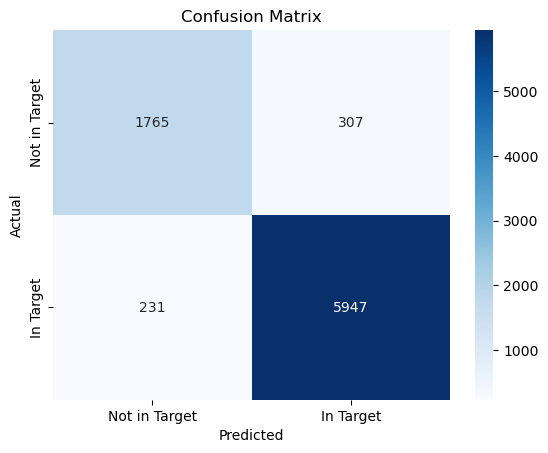

In [154]:
#creat a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Jeff_Y_test, Jeff_Y_test_pred_binary2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not in Target", "In Target"], yticklabels=["Not in Target", "In Target"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [155]:
#do a classificatin report
from sklearn.metrics import classification_report
print(classification_report(Jeff_Y_test, Jeff_Y_test_pred_binary2))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2072
           1       0.95      0.96      0.96      6178

    accuracy                           0.93      8250
   macro avg       0.92      0.91      0.91      8250
weighted avg       0.93      0.93      0.93      8250



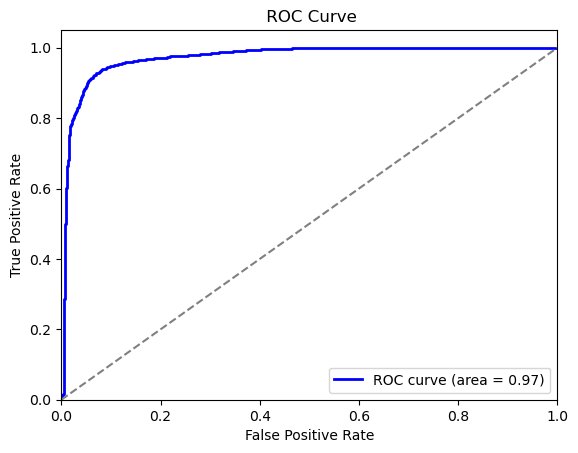

AUC Score: 0.9730


In [156]:
#look at ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Jeff_Y_test, Jeff_Y_test_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {roc_auc:.4f}')

In [158]:
#run variance inflaction
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Convert scaled training data back to a DataFrame for easier interpretation
Jeff_X_train_scaled_df2 = pd.DataFrame(Jeff_X_train_scaled2, columns=selected_features2)
# Add constant for intercept (like in statsmodels)
Jeff_X_train_scaled_df2 = sm.add_constant(Jeff_X_train_scaled_df2)
# Compute VIF for each feature
vif_data2 = pd.DataFrame()  # Create an empty DataFrame
vif_data2["Feature"] = Jeff_X_train_scaled_df2.columns  # Store feature names
vif_data2["VIF"] = [variance_inflation_factor(Jeff_X_train_scaled_df2.values, i) 
                    for i in range(Jeff_X_train_scaled_df2.shape[1])]

In [159]:
print(vif_data2)

               Feature        VIF
0                const   1.000000
1           InBGTarget   1.987804
2          Avg_BG_2hrs   6.492012
3                   BG  10.588584
4      WakeHours_Awake   1.070513
5  Holiday_Not Holiday   1.004492
6         BG_Delta_120   3.992196


In [160]:
#lets try again
selected_features3 = ['InBGTarget','Avg_BG_2hrs','WakeHours_Awake','Holiday_Not Holiday','BG_Delta_120']  # List kept features

Jeff_X_train_selected3 = Jeff_X_train[selected_features3]
Jeff_X_test_selected3 = Jeff_X_test[selected_features3]

In [161]:
scaler = StandardScaler()
Jeff_X_train_scaled3 = scaler.fit_transform(Jeff_X_train_selected3)
Jeff_X_test_scaled3 = scaler.transform(Jeff_X_test_selected3) #transform only, not fitting

In [162]:
#convert back to DataFrame to keep feature names
Jeff_X_train_scaled3 = pd.DataFrame(Jeff_X_train_scaled3, columns=selected_features3)
Jeff_X_test_scaled3 = pd.DataFrame(Jeff_X_test_scaled3, columns=selected_features3)

# Now use Jeff_X_train_scaled for the statsmodels regression
Jeff_X_train_sm3 = sm.add_constant(Jeff_X_train_scaled3)
logit_model = sm.Logit(Jeff_Y_train, Jeff_X_train_sm3)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.146943
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       FutureBGInTarget   No. Observations:                 8249
Model:                          Logit   Df Residuals:                     8243
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.7565
Time:                        21:58:26   Log-Likelihood:                -1212.1
converged:                       True   LL-Null:                       -4978.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6691      0.092     29.076      0.000       2.489       2.849
In

In [163]:
#do predictions again
Jeff_Y_train_pred3 = result.predict(Jeff_X_train_sm3)

Jeff_X_test_sm3 = sm.add_constant(Jeff_X_test_scaled3)  # Add intercept to test data
Jeff_Y_test_pred3 = result.predict(Jeff_X_test_sm3)

In [164]:
#run an accuracy score again
from sklearn.metrics import accuracy_score

# Predict on the test set
Jeff_Y_test_pred3 = result.predict(Jeff_X_test_sm3)  
Jeff_Y_test_pred_binary3 = (Jeff_Y_test_pred3 >= 0.5).astype(int)  # Threshold at 0.5

# compare to train set
Jeff_Y_train_pred3 = result.predict(Jeff_X_train_sm3)  
Jeff_Y_train_pred_binary3 = (Jeff_Y_train_pred3 >= 0.5).astype(int)  # Threshold at 0.5

train_accuracy3 = accuracy_score(Jeff_Y_train, Jeff_Y_train_pred_binary3)
test_accuracy3 = accuracy_score(Jeff_Y_test, Jeff_Y_test_pred_binary3)

print(f"Jeff Training Accuracy: {train_accuracy3:.4f}")
print(f"Jeff Test Accuracy: {test_accuracy3:.4f}")

Jeff Training Accuracy: 0.9398
Jeff Test Accuracy: 0.9362


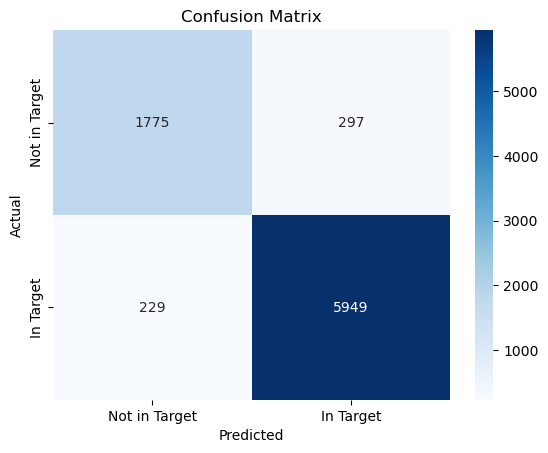

In [165]:
#do a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Jeff_Y_test, Jeff_Y_test_pred_binary3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not in Target", "In Target"], yticklabels=["Not in Target", "In Target"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [166]:
#look at classification report
from sklearn.metrics import classification_report
print(classification_report(Jeff_Y_test, Jeff_Y_test_pred_binary3))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2072
           1       0.95      0.96      0.96      6178

    accuracy                           0.94      8250
   macro avg       0.92      0.91      0.91      8250
weighted avg       0.94      0.94      0.94      8250



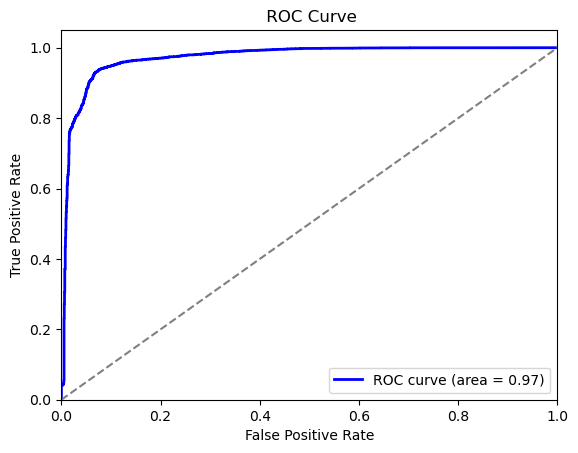

AUC Score: 0.9722


In [167]:
#look at ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Jeff_Y_test, Jeff_Y_test_pred3)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC Score: {roc_auc:.4f}')

In [168]:
#do a variance inflaction factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Convert scaled training data back to a DataFrame for easier interpretation
Jeff_X_train_scaled_df3 = pd.DataFrame(Jeff_X_train_scaled3, columns=selected_features3)
# Add constant for intercept (like in statsmodels)
Jeff_X_train_scaled_df3 = sm.add_constant(Jeff_X_train_scaled_df3)
# Compute VIF for each feature
vif_data3 = pd.DataFrame()  # Create an empty DataFrame
vif_data3["Feature"] = Jeff_X_train_scaled_df3.columns  # Store feature names
vif_data3["VIF"] = [variance_inflation_factor(Jeff_X_train_scaled_df3.values, i) 
                    for i in range(Jeff_X_train_scaled_df3.shape[1])]

In [169]:
print(vif_data3)

               Feature       VIF
0                const  1.000000
1           InBGTarget  1.831155
2          Avg_BG_2hrs  1.517829
3      WakeHours_Awake  1.068730
4  Holiday_Not Holiday  1.003792
5         BG_Delta_120  1.262492
